In [1]:
loans <- read.csv('loan_data.csv')
head(loans)

credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1,debt_consolidation,0.1189,829.10,11.35041,19.48,737,5639.958,28854,52.1,0,0,0,0
1,credit_card,0.1071,228.22,11.08214,14.29,707,2760.000,33623,76.7,0,0,0,0
1,debt_consolidation,0.1357,366.86,10.37349,11.63,682,4710.000,3511,25.6,1,0,0,0
1,debt_consolidation,0.1008,162.34,11.35041,8.10,712,2699.958,33667,73.2,1,0,0,0
1,credit_card,0.1426,102.92,11.29973,14.97,667,4066.000,4740,39.5,0,1,0,0
1,credit_card,0.0788,125.13,11.90497,16.98,727,6120.042,50807,51.0,0,0,0,0


In [3]:
str(loans)

'data.frame':	9578 obs. of  14 variables:
 $ credit.policy    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ purpose          : Factor w/ 7 levels "all_other","credit_card",..: 3 2 3 3 2 2 3 1 5 3 ...
 $ int.rate         : num  0.119 0.107 0.136 0.101 0.143 ...
 $ installment      : num  829 228 367 162 103 ...
 $ log.annual.inc   : num  11.4 11.1 10.4 11.4 11.3 ...
 $ dti              : num  19.5 14.3 11.6 8.1 15 ...
 $ fico             : int  737 707 682 712 667 727 667 722 682 707 ...
 $ days.with.cr.line: num  5640 2760 4710 2700 4066 ...
 $ revol.bal        : int  28854 33623 3511 33667 4740 50807 3839 24220 69909 5630 ...
 $ revol.util       : num  52.1 76.7 25.6 73.2 39.5 51 76.8 68.6 51.1 23 ...
 $ inq.last.6mths   : int  0 0 1 1 0 0 0 0 1 1 ...
 $ delinq.2yrs      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ pub.rec          : int  0 0 0 0 0 0 1 0 0 0 ...
 $ not.fully.paid   : int  0 0 0 0 0 0 1 1 0 0 ...


In [4]:
summary(loans)

 credit.policy                 purpose        int.rate       installment    
 Min.   :0.000   all_other         :2331   Min.   :0.0600   Min.   : 15.67  
 1st Qu.:1.000   credit_card       :1262   1st Qu.:0.1039   1st Qu.:163.77  
 Median :1.000   debt_consolidation:3957   Median :0.1221   Median :268.95  
 Mean   :0.805   educational       : 343   Mean   :0.1226   Mean   :319.09  
 3rd Qu.:1.000   home_improvement  : 629   3rd Qu.:0.1407   3rd Qu.:432.76  
 Max.   :1.000   major_purchase    : 437   Max.   :0.2164   Max.   :940.14  
                 small_business    : 619                                    
 log.annual.inc        dti              fico       days.with.cr.line
 Min.   : 7.548   Min.   : 0.000   Min.   :612.0   Min.   :  179    
 1st Qu.:10.558   1st Qu.: 7.213   1st Qu.:682.0   1st Qu.: 2820    
 Median :10.929   Median :12.665   Median :707.0   Median : 4140    
 Mean   :10.932   Mean   :12.607   Mean   :710.8   Mean   : 4561    
 3rd Qu.:11.291   3rd Qu.:17.950   3rd 

In [5]:
loans$inq.last.6mths <- factor(loans$inq.last.6mths)
loans$delinq.2yrs <- factor(loans$delinq.2yrs)
loans$pub.rec <- sapply(loans$pub.rec, factor)
loans$not.fully.paid <- sapply(loans$not.fully.paid, factor)
loans$credit.policy <- sapply(loans$credit.policy, factor)
str(loans)

'data.frame':	9578 obs. of  14 variables:
 $ credit.policy    : Factor w/ 2 levels "1","0": 1 1 1 1 1 1 1 1 1 1 ...
 $ purpose          : Factor w/ 7 levels "all_other","credit_card",..: 3 2 3 3 2 2 3 1 5 3 ...
 $ int.rate         : num  0.119 0.107 0.136 0.101 0.143 ...
 $ installment      : num  829 228 367 162 103 ...
 $ log.annual.inc   : num  11.4 11.1 10.4 11.4 11.3 ...
 $ dti              : num  19.5 14.3 11.6 8.1 15 ...
 $ fico             : int  737 707 682 712 667 727 667 722 682 707 ...
 $ days.with.cr.line: num  5640 2760 4710 2700 4066 ...
 $ revol.bal        : int  28854 33623 3511 33667 4740 50807 3839 24220 69909 5630 ...
 $ revol.util       : num  52.1 76.7 25.6 73.2 39.5 51 76.8 68.6 51.1 23 ...
 $ inq.last.6mths   : Factor w/ 28 levels "0","1","2","3",..: 1 1 2 2 1 1 1 1 2 2 ...
 $ delinq.2yrs      : Factor w/ 11 levels "0","1","2","3",..: 1 1 1 1 2 1 1 1 1 1 ...
 $ pub.rec          : Factor w/ 6 levels "0","1","2","3",..: 1 1 1 1 1 1 2 1 1 1 ...
 $ not.fully.paid   

In [7]:
install.packages('e1071', repos='http://cran.us.r-project.org')

package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\yren\AppData\Local\Temp\Rtmpykl22h\downloaded_packages


In [9]:
library(dplyr)
library(e1071)
library(ggplot2)

In [16]:
distinct(loans, not.fully.paid)

not.fully.paid
0
1


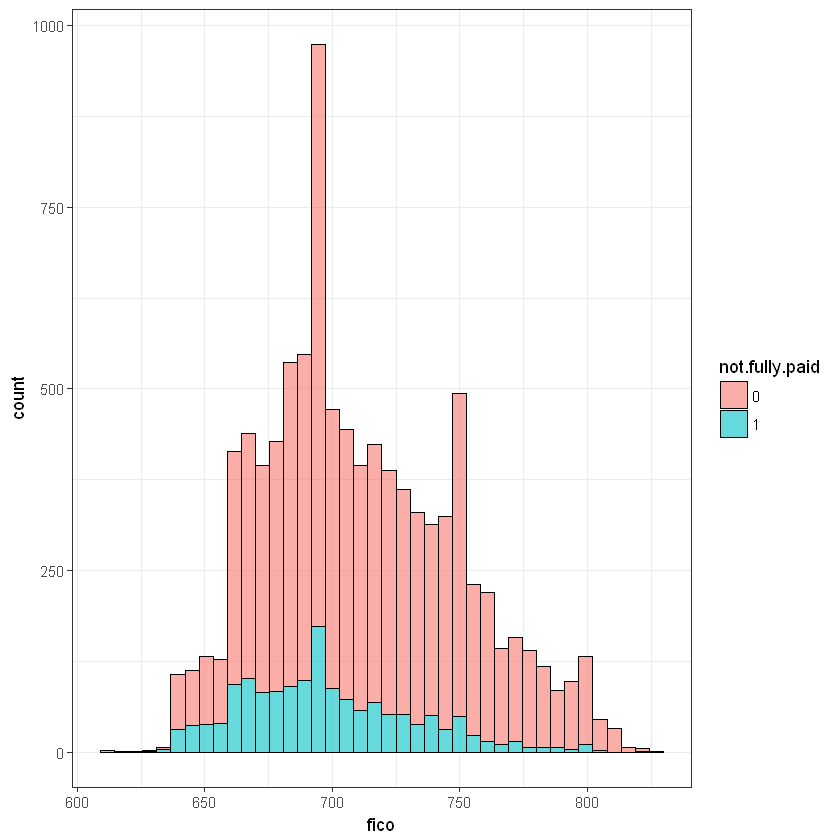

In [20]:
ggplot(loans, aes(fico)) + geom_histogram(aes(fill=not.fully.paid), color='black', bins = 40, alpha = 0.6) + theme_bw()

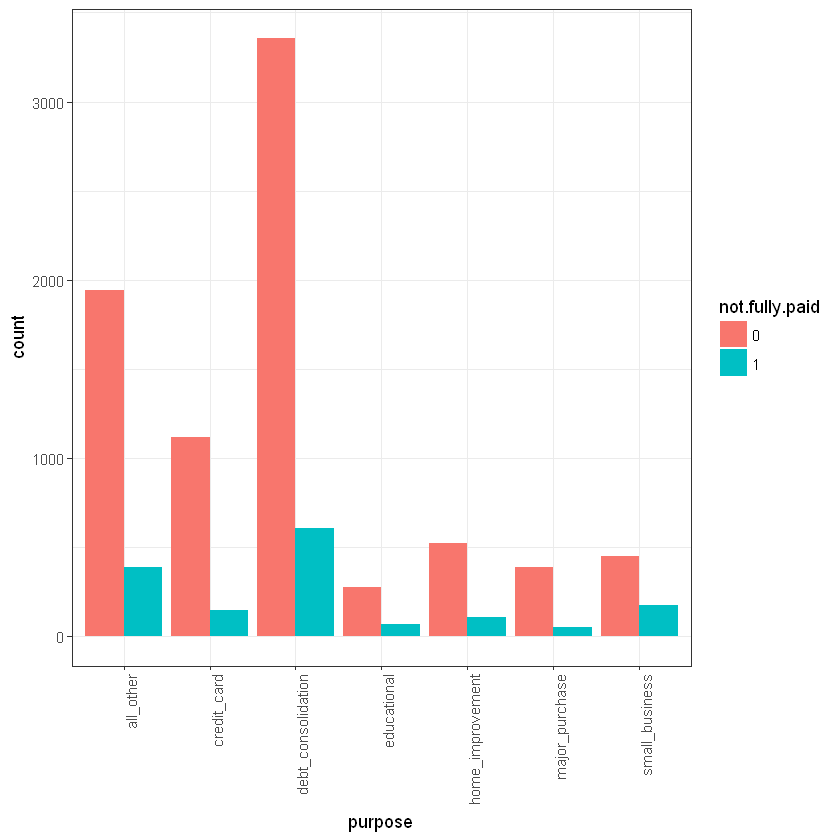

In [25]:
ggplot(loans, aes(purpose)) + geom_bar(aes(fill=not.fully.paid), position = 'dodge') + theme_bw() + theme(axis.text.x = element_text(angle = 90, hjust = 1))

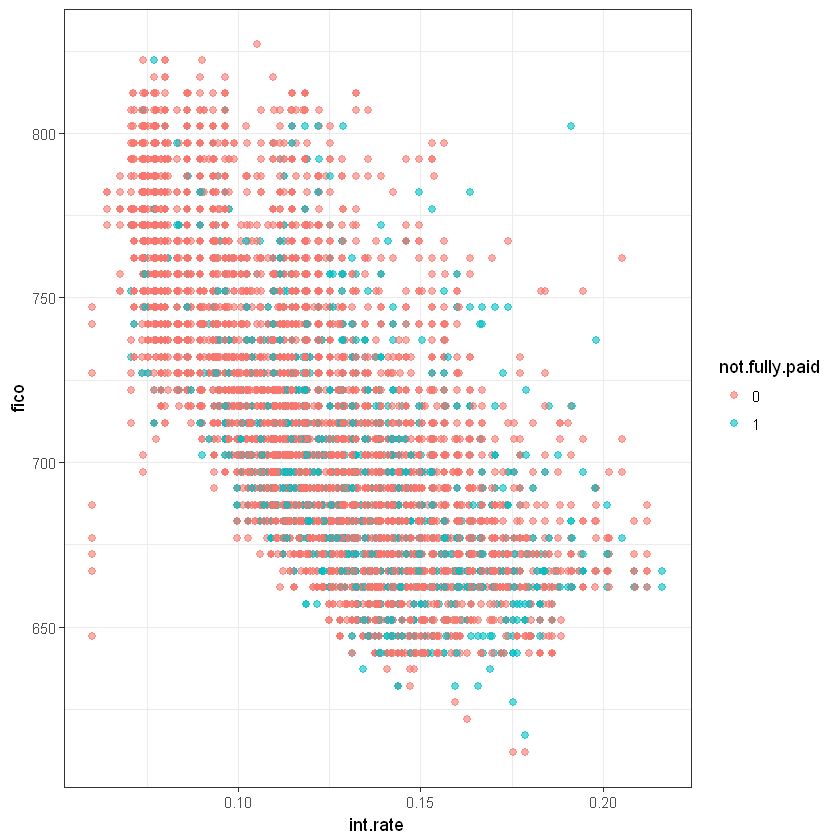

In [29]:
ggplot(loans, aes(int.rate, fico)) + geom_point(aes(color=not.fully.paid), size=2, alpha=0.6) + theme_bw()

In [30]:
library(caTools)

In [31]:
sample <- sample.split(loans$not.fully.paid, SplitRatio = 0.7)
train <- subset(loans, sample==T)
test <- subset(loans, sample==F)

In [39]:
model <- svm(not.fully.paid ~ ., data = train)
summary(model)


Call:
svm(formula = not.fully.paid ~ ., data = train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.01724138 

Number of Support Vectors:  2856

 ( 1783 1073 )


Number of Classes:  2 

Levels: 
 0 1




In [40]:
pred <- predict(model, test)

In [41]:
table(pred, test$not.fully.paid)

    
pred    0    1
   0 2413  460
   1    0    0

In [88]:
tuned <- tune(svm, train.x=not.fully.paid ~ ., data=train, kernel='radial', ranges=list(cost=c(150, 200, 250), gamma=c(0.05, 0.1, 0.15)))

In [89]:
summary(tuned)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
  150  0.05

- best performance: 0.1852317 

- Detailed performance results:
  cost gamma     error dispersion
1  150  0.05 0.1852317 0.01813253
2  200  0.05 0.1909002 0.01706590
3  250  0.05 0.1956728 0.01763484
4  150  0.10 0.2210270 0.01694328
5  200  0.10 0.2259472 0.01760068
6  250  0.10 0.2308677 0.01786717
7  150  0.15 0.2399629 0.01775580
8  200  0.15 0.2441388 0.01752266
9  250  0.15 0.2484648 0.01682987


In [96]:
model2 <- svm(not.fully.paid ~ ., data = train, cost = 250, gramma = 0.01)
summary(model2)


Call:
svm(formula = not.fully.paid ~ ., data = train, cost = 250, gramma = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  250 
      gamma:  0.01724138 

Number of Support Vectors:  2684

 ( 1619 1065 )


Number of Classes:  2 

Levels: 
 0 1




In [97]:
pred2 <- predict(model2, test[1:13])
table(pred2, test$not.fully.paid)

     
pred2    0    1
    0 2383  440
    1   30   20

In [98]:
dim(filter(test, not.fully.paid==1))[1]

[1] 460